In [60]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 27)
pd.set_option('display.width', 1000)
print('asss')

asss


In [61]:
#loading and selection of best fit columns from jdt.csv
jdt_df = pd.read_csv("jdt.csv")
#print(jdt_df.info())
jdt_df_1 = jdt_df.iloc[:,1:62]
jdt_labels = jdt_df.iloc[:,62]
#print(jdt_labels)
best_features = SelectKBest(score_func=chi2, k=15)
jdt_fit = best_features.fit_transform(jdt_df_1,jdt_labels)
jdt_fit_columns = best_features.get_support(indices=True)
jdt_fit_column_names = list(jdt_df.columns)
jdt_fit_selected_columns_name = []
for jdt_fit_column in jdt_fit_columns:
    jdt_fit_selected_columns_name.append(jdt_fit_column_names[jdt_fit_column])
print(jdt_fit_selected_columns_name)
print('asss')

['LDHH_fanIn', 'numberOfCriticalBugsFoundUntil:', 'LDHH_numberOfAttributesInherited', 'WCHU_wmc', 'ck_oo_fanOut', 'ck_oo_numberOfAttributesInherited', 'WCHU_dit', 'WCHU_numberOfAttributesInherited', 'WCHU_fanOut', 'WCHU_lcom', 'ck_oo_cbo', 'WCHU_rfc', 'WCHU_numberOfMethodsInherited', 'ck_oo_numberOfMethodsInherited', 'LDHH_cbo']
asss


In [62]:
#loading and selection of best fit columns from safe.csv
ar5_df = pd.read_csv("zxing.csv")
#print(ar5_df.info())
ar5_df_1 = ar5_df.iloc[:,1:27]
ar5_labels = ar5_df.iloc[:,27]
#print(ar5_labels)
best_features = SelectKBest(score_func=chi2, k=15)
ar5_fit = best_features.fit_transform(ar5_df_1,ar5_labels)
ar5_fit_columns = best_features.get_support(indices=True)
ar5_fit_column_names = list(ar5_df.columns)
ar5_fit_selected_columns_name = []
for ar5_fit_column in ar5_fit_columns:
    ar5_fit_selected_columns_name.append(ar5_fit_column_names[ar5_fit_column])
print(ar5_fit_selected_columns_name)
print('dssd')

['AvgLineComment', 'CountLine', 'CountLineBlank', 'CountLineCode', 'CountLineCodeDecl', 'CountLineCodeExe', 'CountLineComment', 'CountSemicolon', 'CountStmt', 'CountStmtDecl', 'CountStmtExe', 'MaxCyclomaticModified', 'RatioCommentToCode', 'SumCyclomatic', 'SumCyclomaticModified']
dssd


In [63]:
#conversion of datasets
jdt_matrix = pd.DataFrame(jdt_fit)
ar5_matrix = pd.DataFrame(ar5_fit)
print(jdt_matrix.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       997 non-null    float64
 1   1       997 non-null    float64
 2   2       997 non-null    float64
 3   3       997 non-null    float64
 4   4       997 non-null    float64
 5   5       997 non-null    float64
 6   6       997 non-null    float64
 7   7       997 non-null    float64
 8   8       997 non-null    float64
 9   9       997 non-null    float64
 10  10      997 non-null    float64
 11  11      997 non-null    float64
 12  12      997 non-null    float64
 13  13      997 non-null    float64
 14  14      997 non-null    float64
dtypes: float64(15)
memory usage: 117.0 KB
None


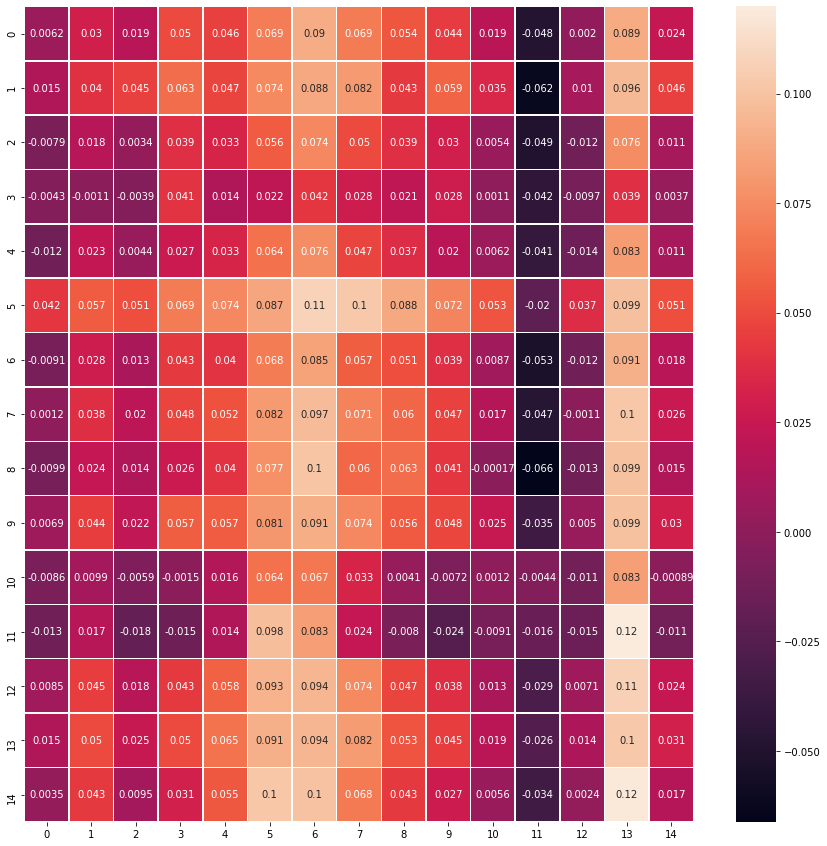

In [64]:
#Testing------------------------------------------------------------------
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,15))

#corr_data_frame = pd.concat([ar5_matrix, jdt_matrix], axis=1,).corr()
corr_data_frame = pd.concat([ar5_matrix, jdt_matrix], axis=1, keys=['ar5_matrix', 'jdt_matrix']).corr().loc['ar5_matrix', 'jdt_matrix']

#print(corr_data_frame)
sn.heatmap(corr_data_frame, annot=True, linewidths=.5, ax=ax)
plt.show()

In [67]:
#calculation of correlation
corr_data_frame = pd.concat([ar5_matrix, jdt_matrix], axis=1, keys=['ar5_matrix', 'jdt_matrix']).corr().loc['ar5_matrix', 'jdt_matrix']
corr_metrix = pd.DataFrame(corr_data_frame.values,columns=ar5_fit_selected_columns_name)
corr_metrix['index_name'] = jdt_fit_selected_columns_name
corr_metrix.set_index('index_name', inplace = True)
#print("matix", corr_metrix)
#file = open("matrix_jdt_zing.txt", "w")
#file.write(str(corr_metrix))
#file.close()
#print('asss')

corr_pairs = corr_metrix.unstack()

#print(corr_pairs)
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

                       index_name                       
MaxCyclomaticModified  WCHU_fanOut                         -0.066151
                       numberOfCriticalBugsFoundUntil:     -0.062385
                       WCHU_dit                            -0.052668
                       LDHH_numberOfAttributesInherited    -0.049499
                       LDHH_fanIn                          -0.048100
                       WCHU_numberOfAttributesInherited    -0.047012
                       WCHU_wmc                            -0.042226
                       ck_oo_fanOut                        -0.040628
                       WCHU_lcom                           -0.034933
                       LDHH_cbo                            -0.034317
                       WCHU_numberOfMethodsInherited       -0.029400
                       ck_oo_numberOfMethodsInherited      -0.026018
CountStmtDecl          WCHU_rfc                            -0.024059
MaxCyclomaticModified  ck_oo_numberOfAttribute

In [66]:
strong_pairs = sorted_pairs[(sorted_pairs) > 0.05]

print(strong_pairs)

                       index_name                       
CountLineCode          ck_oo_numberOfMethodsInherited       0.050058
CountLineBlank         ck_oo_numberOfAttributesInherited    0.050946
SumCyclomaticModified  ck_oo_numberOfAttributesInherited    0.051307
CountStmt              WCHU_dit                             0.051461
CountLineCodeDecl      WCHU_numberOfAttributesInherited     0.052455
CountStmt              ck_oo_numberOfMethodsInherited       0.053206
CountStmtExe           ck_oo_numberOfAttributesInherited    0.053239
CountStmt              LDHH_fanIn                           0.054387
CountLineCodeDecl      LDHH_cbo                             0.054794
CountStmt              WCHU_lcom                            0.055867
CountLineCodeExe       LDHH_numberOfAttributesInherited     0.055970
CountLine              ck_oo_numberOfAttributesInherited    0.056564
CountLineCodeDecl      WCHU_lcom                            0.056575
CountLineCode          WCHU_lcom              

In [58]:
corr_concat = pd.concat([ar5_matrix, jdt_matrix], axis=1, keys=['ar5_matrix', 'jdt_matrix'])
cov = np.cov(corr_concat.T)

print(str(cov))

[[         nan          nan          nan ...          nan          nan
           nan]
 [         nan          nan          nan ...          nan          nan
           nan]
 [         nan          nan          nan ...          nan          nan
           nan]
 ...
 [         nan          nan          nan ... 489.5860755  187.79626127
  158.91734071]
 [         nan          nan          nan ... 187.79626127 398.69556662
   76.65341327]
 [         nan          nan          nan ... 158.91734071  76.65341327
   74.06834005]]


In [43]:

stds = np.std(corr_concat, axis = 0) #shape = (6,)

stds_matrix = np.array([[stds[i]*stds[j] for j in range(52)] for i in range(52)])

print("standard deviations matrix of shape:",stds_matrix.shape)

standard deviations matrix of shape: (52, 52)


In [44]:
new_corr = cov/stds_matrix

In [56]:
pd.options.display.max_seq_items = 2000
print(str(new_corr))

[[       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 ...
 [       nan        nan        nan ... 1.00100402 0.42548821 0.835365  ]
 [       nan        nan        nan ... 0.42548821 1.00100402 0.44650909]
 [       nan        nan        nan ... 0.835365   0.44650909 1.00100402]]
